# Lab 3. Genetic Algorithms
# Task 3.3 The Map Colouring Problem
## Problem Descriptions
The map colouring problem is to colour a map with maximal number of different
colours so that no neighbouring regions in the map have the same colour. You may
have heard of the four colours theorem that states no more than four colours are
required to colour any 2D map.



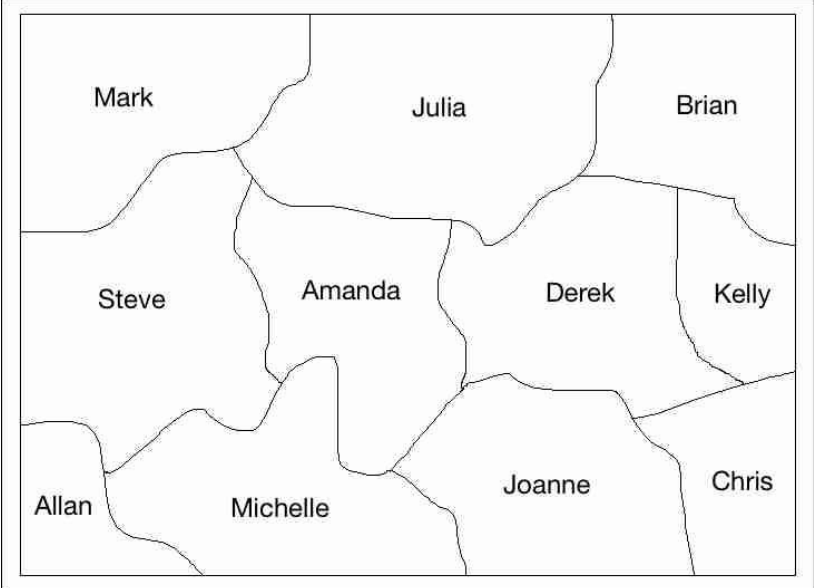

# implementation

In [ ]:
!pip install deap
import array
import random
import numpy as np
from deap import creator, base, tools, algorithms

     |████████████████████████████████| 163kB 2.8MB/s 


In [ ]:
# Specify the variables
numColour = 4
numNames = 11
colours = ('red', 'green', 'blue', 'gray')
names = ('Mark', 'Julia', 'Steve', 'Amanda', 'Brian', 
         'Joanne', 'Derek', 'Allan', 'Michelle', 'Kelly', 'Chris')

# Define the neighbours
neighbours =  [ [0,1,1,0,0,0,0,0,0,0,0],
                [0,0,1,1,1,0,1,0,0,0,0],
                [0,0,0,1,0,0,0,1,1,0,0],
                [0,0,0,0,0,1,1,0,1,0,0],
                [0,0,0,0,0,0,1,0,0,1,0],
                [0,0,0,0,0,0,1,0,1,1,1],
                [0,0,0,0,0,0,0,0,0,1,1],
                [0,0,0,0,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,0,0,0,0]]


In [ ]:
def evalMapColouring(ind):
    val = 0
    for i in range(0, numNames):
      for j in range(0, numNames):
        if (neighbours[i][j] == 1) and (ind[i] == ind[j]):
            val += 1
    return val,
    
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_colour", random.randint, 0, numColour-1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_colour, numNames)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evalMapColouring)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=numColour-1, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)


In [ ]:
pop = toolbox.population(n=10)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.8, mutpb=0.4, ngen=100, 
                              stats=stats, verbose=True)
    
best = tools.selBest(pop, 1)[0]
print("Best: %s. Fitness: %s." %(best.tolist(), evalMapColouring(best)[0]))
for i in range(numNames):
  print("%s ==> %s" %(names[i], colours[best[i]]))

gen	nevals	min
0  	10    	2  
1  	10    	0  
2  	10    	1  
3  	9     	1  
4  	9     	1  
5  	8     	0  
6  	8     	0  
7  	9     	0  
8  	8     	0  
9  	10    	0  
10 	7     	0  
11 	10    	0  
12 	8     	0  
13 	6     	0  
14 	8     	0  
15 	8     	0  
16 	10    	0  
17 	10    	0  
18 	10    	0  
19 	9     	0  
20 	7     	0  
21 	9     	0  
22 	10    	0  
23 	7     	0  
24 	10    	0  
25 	8     	0  
26 	8     	0  
27 	10    	0  
28 	10    	0  
29 	8     	0  
30 	9     	0  
31 	8     	0  
32 	6     	0  
33 	10    	0  
34 	8     	0  
35 	8     	0  
36 	10    	0  
37 	10    	0  
38 	8     	0  
39 	8     	0  
40 	9     	0  
41 	10    	0  
42 	10    	0  
43 	9     	0  
44 	9     	0  
45 	10    	0  
46 	8     	0  
47 	9     	0  
48 	8     	0  
49 	10    	0  
50 	8     	0  
51 	7     	0  
52 	8     	0  
53 	10    	0  
54 	10    	0  
55 	10    	0  
56 	10    	0  
57 	8     	0  
58 	10    	0  
59 	7     	0  
60 	10    	0  
61 	9     	0  
62 	9     	0  
63 	9     	0  
64 	6     	0  
65 	7     

## Discussions

We will use the DEAP (Distributed Evolutionary Algorithms in Python) in this lab. It
provides all the basic generic algorithms we studied in the lectures, as well as other
related methods such as genetic programming, evolution strategies and particle
swarm optimisation etc. 



encoding scheme:- each individual is an array of with length equal to total number of cities. and element in array repersent colour to be used. each colour is repersented by integer.

 colours = ('red', 'green', 'blue', 'gray') 

 selection: tournament selection

fitness function: less the number of adjacent region with same colour, better the individual.

genetic operators: mutation and cross over.

our solution came as:-
[1, 3, 0, 2, 2, 1, 0, 2, 3, 3, 2]

here each array element repersent colour from below table.

colours = ('red', 'green', 'blue', 'gray')

